EDA edx

In [4]:
# Librerías a utilizar:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings("ignore")

In [5]:
df_edx_courses = pd.read_csv('edx_courses.csv', sep=',')

In [6]:
df_edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               974 non-null    object
 1   summary             974 non-null    object
 2   n_enrolled          974 non-null    int64 
 3   course_type         974 non-null    object
 4   institution         974 non-null    object
 5   instructors         971 non-null    object
 6   Level               974 non-null    object
 7   subject             974 non-null    object
 8   language            974 non-null    object
 9   subtitles           971 non-null    object
 10  course_effort       974 non-null    object
 11  course_length       974 non-null    object
 12  price               974 non-null    object
 13  course_description  934 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          974 non-null    object
 16  price_USD           974 no

Podemos notar que no cuenta con la información de cuantos de sus subscriptores pagan por el certificado, pero dado que sin certificado nada abala que en realidad el usuario haya cursado el curso, podemos inferir que de las personas que terminan todos o por lo menos la gran mayoría paga por el curso.

Análisis de la columna 'price_USD'

In [7]:
# Rango de precios en USD
vmin = df_edx_courses['price_USD'].min()
vmax = df_edx_courses['price_USD'].max()
rango_precios = []
rango_precios.append(vmin)
rango_precios.append(vmax)
print(f'Analizando la columna de precios obtenemos el rango {rango_precios} en unidades de USD')

Analizando la columna de precios obtenemos el rango [5, 450] en unidades de USD


In [8]:
# Precio promedio
avg_precio = df_edx_courses['price_USD'].mean()
avg_precio= "{:.2f}".format(avg_precio)
print(f'Y vemos que el valor promedio es de {avg_precio}')

Y vemos que el valor promedio es de 100.46


In [9]:
mode_precio = df_edx_courses['price_USD'].mode()
mode_precio = mode_precio[0]
print(f'Pero el precio que más se a comprado ronda alrededor de {mode_precio} USD')

Pero el precio que más se a comprado ronda alrededor de 49 USD


Análisis de la columna 'n_enrolled'

In [10]:
num_min = df_edx_courses['n_enrolled'].min()
num_max = df_edx_courses['n_enrolled'].max()
rango_subscriptores = []
rango_subscriptores.append(num_min)
rango_subscriptores.append(num_max)
print(f'Analizando la columna de subscriptores obtenemos el rango {rango_subscriptores}')

Analizando la columna de subscriptores obtenemos el rango [0, 2442271]


In [11]:
avg_subscriptores = df_edx_courses['n_enrolled'].mean()
avg_subscriptores= "{:.2f}".format(avg_subscriptores)
print(f'Y vemos que el promedio es de {avg_subscriptores}')

Y vemos que el promedio es de 46653.29


Graficamos la relación entre la cantidad de subscriptores por curso y su precio

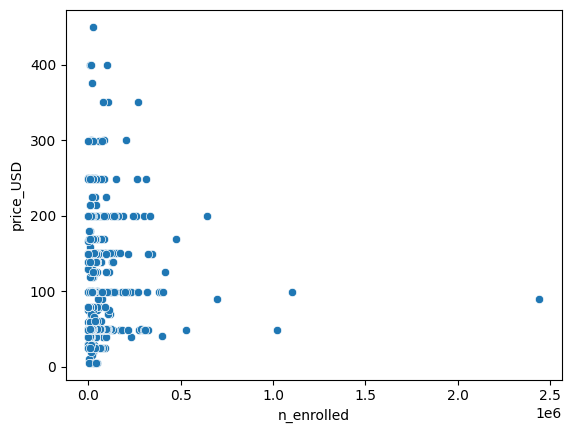

In [12]:
ax = sns.scatterplot(x = 'n_enrolled', y = 'price_USD', data= df_edx_courses)

Notamos que muy probablemente tenemos outliers en la información, por lo que procederemos a identificarlos y posteriormente mostrar el comportamiento sin outliers

Identificación de Outliers en 'n_enrolled'

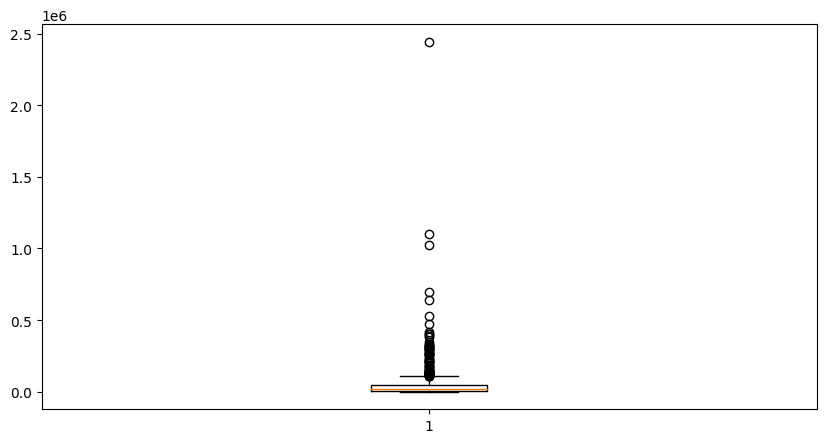

In [13]:
fig = plt.figure(figsize =(10, 5))
# Creating plot
plt.boxplot(df_edx_courses['n_enrolled'])
# show plot
plt.show()

In [14]:
# Se acomodan las cantidades para un cálculo correcto
sorted_data = np.sort(df_edx_courses['n_enrolled'])
# Se calculan el primer quartile (Q1) y el tercer quartile (Q3)
Q1 = np.percentile(sorted_data, 25)
Q3 = np.percentile(sorted_data, 75)
# Calculo del rango interquartile  (IQR)
IQR = Q3 - Q1
# Calculo de los limites inferiores y superiores para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify the outliers
outliers = df_edx_courses['n_enrolled'][(df_edx_courses['n_enrolled'] < lower_bound) | (df_edx_courses['n_enrolled'] > upper_bound)]
# Valores outliers
print(f'Cantidad de outliers: {outliers.count()}')
print(f'Lista: {outliers}')
print(f'min outlier: {outliers.min()}')

Cantidad de outliers: 75
Lista: 0       124980
1       293864
2      2442271
3       129555
5       301793
        ...   
248     318399
259     150855
263     131197
401     270376
684     138884
Name: n_enrolled, Length: 75, dtype: int64
min outlier: 110024


Identificación de outliers en 'price_USD'

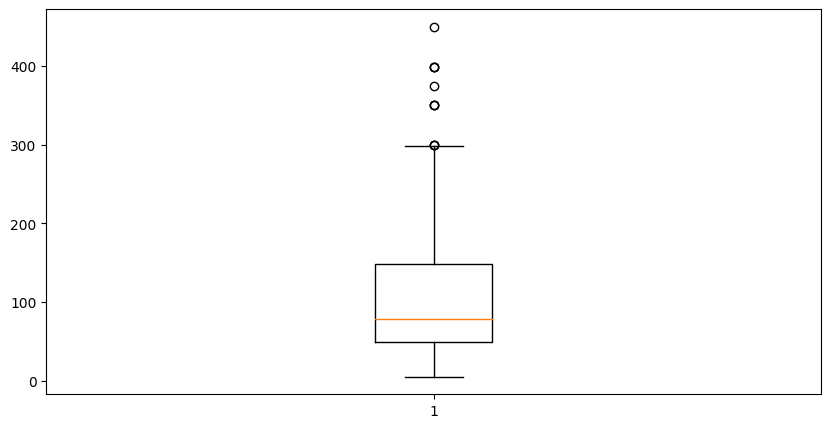

In [15]:
fig = plt.figure(figsize =(10, 5))
# Creating plot
plt.boxplot(df_edx_courses['price_USD'])
# show plot
plt.show()

In [16]:
# Se acomodan las cantidades para un cálculo correcto
sorted_data_price = np.sort(df_edx_courses['price_USD'])
# Se calculan el primer quartile (Q1) y el tercer quartile (Q3)
Q1 = np.percentile(sorted_data_price, 25)
Q3 = np.percentile(sorted_data_price, 75)
# Calculo del rango interquartile  (IQR)
IQR = Q3 - Q1
# Calculo de los limites inferiores y superiores para outliers
lower_bound_price = Q1 - 1.5 * IQR
upper_bound_price = Q3 + 1.5 * IQR
# Identify the outliers
outliers_price = df_edx_courses['price_USD'][(df_edx_courses['price_USD'] < lower_bound_price) | (df_edx_courses['price_USD'] > upper_bound_price)]
# Valores outliers
print(f'Cantidad de outliers: {outliers_price.count()}')
print(f'Lista: {outliers_price}')
print(f'min outlier: {outliers_price.min()}')

Cantidad de outliers: 11
Lista: 19     399
91     300
105    300
133    350
156    450
162    350
307    350
542    399
593    375
804    300
841    399
Name: price_USD, dtype: int64
min outlier: 300


Gráfica para mostrar el comportamiento de los precios según la cantidad de cursos

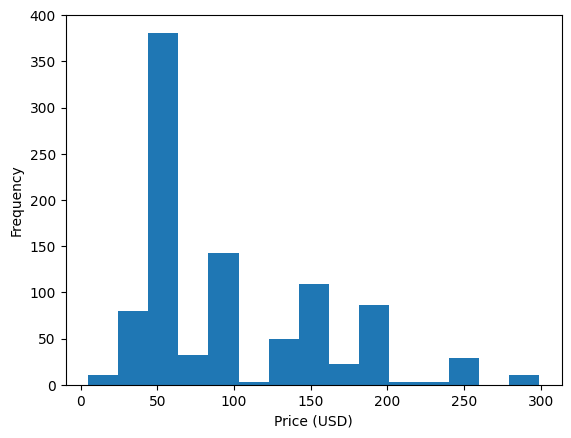

In [17]:
# df sin outliers para 'price'
df_edx_price = df_edx_courses[df_edx_courses['price_USD'] < 300]
# Histograma
num_bins = 15
fig, ax = plt.subplots()
ax.set_xlabel('Price (USD)')
ax.set_ylabel('Frequency')
n = ax.hist(df_edx_price['price_USD'], bins=num_bins)

Nótese que la mayoría de los cursos tienen un precio alrededor de los 50 USD, y los cursos que tienden a un precio mayor son menos

Gráfica para mostrar el comportamiento de los subscriptores según sus agrupaciones (cantidades) y frecuencias

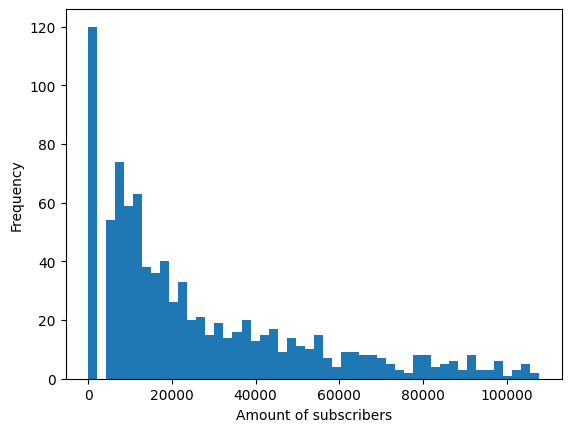

In [18]:
# df sin outliers para 'price'
df_edx_price = df_edx_courses[df_edx_courses['n_enrolled'] < 110024]
# Histograma
num_bins = 50
fig, ax = plt.subplots()
ax.set_xlabel('Amount of subscribers')
ax.set_ylabel('Frequency')
n = ax.hist(df_edx_price['n_enrolled'], bins=num_bins)

Nótense 2 cosas:

1.- los subscriptores tienden a agruparse mayormente en conjuntos de 10,000 personas, y conforme los grupos incrementan sobresalen los cursos más populares.

2.- Existen gran cantidad de cursos que no tenían registro de su cantidad de subscriptores, por lo que se infirió que contaban con 0 (cero) subscriptores

Gráfica para mostrar la correlación entre los comportamientos de los subscriptores y precios

[Text(0.5, 0, 'Price (usd)'),
 Text(0, 0.5, 'subscribers'),
 Text(0.5, 1.0, 'Price vs. subscribers'),
 (0.0, 310.0)]

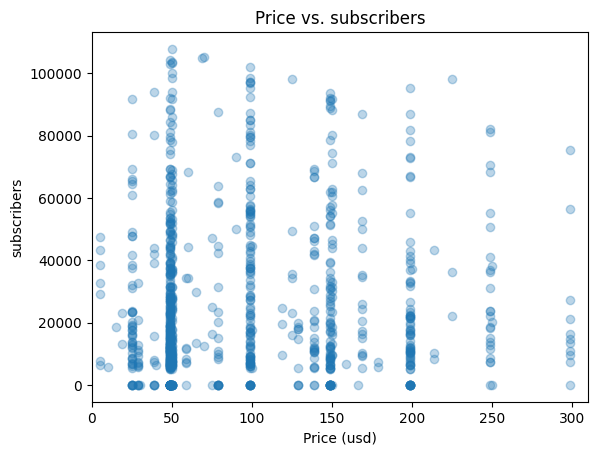

In [19]:
df_edx_sin_outliers = df_edx_courses[(df_edx_courses['n_enrolled'] < 110024) & (df_edx_courses['price_USD'] < 300)]
fig = plt.figure()
ax = plt.axes()
# Graficamos putnos semi transparentes, cada uno con el label adecuado
ax.scatter(df_edx_sin_outliers['price_USD'], df_edx_sin_outliers['n_enrolled'],alpha = 0.3)

ax.set(xlabel='Price (usd)', ylabel='subscribers',
       title='Price vs. subscribers', xlim = (0,310))

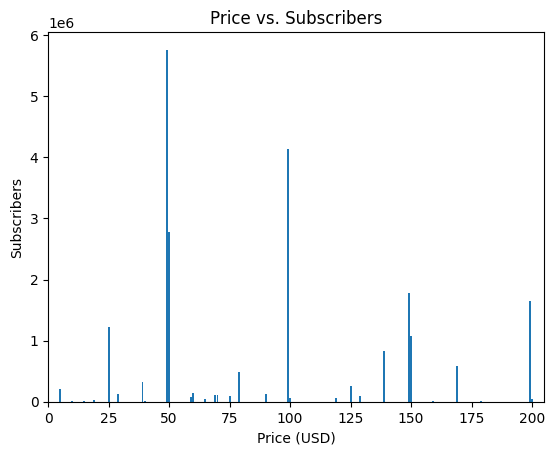

In [42]:
df_edx_sin_outliers = df_edx_courses[(df_edx_courses['n_enrolled'] < 110024) & (df_edx_courses['price_USD'] < 300)]
# Calculate the average number of subscribers for each price category
df_grouped = df_edx_sin_outliers.groupby('price_USD')['n_enrolled'].sum().reset_index()

# Plotting the bar diagram
fig, ax = plt.subplots()
ax.bar(df_grouped['price_USD'], df_grouped['n_enrolled'], alpha= 1)

ax.set(xlabel='Price (USD)', ylabel='Subscribers',
       title='Price vs. Subscribers', xlim=(0, 300))

plt.show()

Nótese 2 cosas:

1.- los cursos de todos los rángos de subscriptores ([0:110000]) tienden a preferir los precios bajos, principalemente alrededor de $50 y $150 dólares.

2.- Los cursos con grándes agrupaciones de subscriptores de igual forma tienden a escoger cursos con precios bajos alrededor de $50 USD y conforme el precio sube las agrupaciones por curso disminuyen.



Ahora procederemos a:

1.- Encontrar la preferencia general de los subscriptores analizando las preferencias de nivel ('Level'), idioma ('language') y sus reseñas ('reviews / Wordclud).

2.- localizar los cursos más populares (mayores agrupaciones de subscriptores) analizando las variables mencionadas. Es decir comparar primero con todos los cursos, y después sólamente con los cursos con mayores agrupaciones.

Análisis de Nivel

Analizando todos los cursos:

In [21]:
grouped_level = df_edx_courses.groupby('Level')
grouped_level = grouped_level['title'].count()
grouped_level = pd.DataFrame(grouped_level)
grouped_level

,title
Level,
Advanced,87
Intermediate,266
Introductory,621


Comenzando por analizar los niveles: Tenemos 3 niveles en los cuales se distribuyen los cursos (Introductory, Intermediate y Advanced), y como podemos observar Introductory lidera por bastante.

Analizando los cursos populares (más de 60000 subscriptores)

In [22]:
grouped_level_pop = df_edx_courses[df_edx_courses['n_enrolled'] > 60000].groupby('Level')
grouped_level_pop = grouped_level_pop['title'].count()
grouped_level_pop = pd.DataFrame(grouped_level_pop)
grouped_level_pop

,title
Level,
Advanced,14
Intermediate,42
Introductory,135


Visualización:

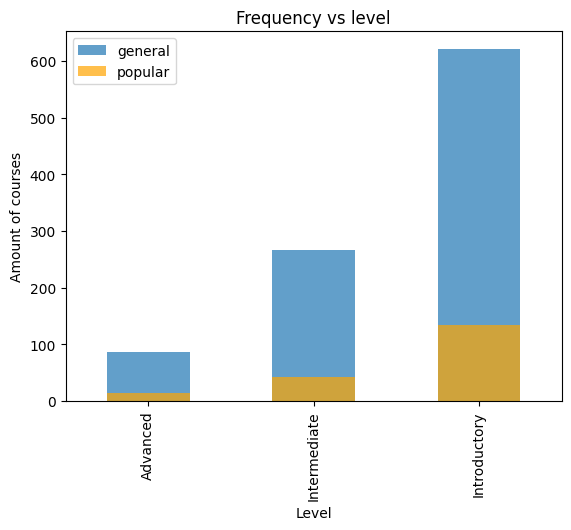

In [39]:
ax = grouped_level.plot(kind='bar', alpha=0.7, label='Diagram 1')

# Plot the second bar diagram, positioning it next to the first one
grouped_level_pop.plot(kind='bar', ax=ax, color='orange', alpha=0.7, label='Diagram 2')

# Set the labels and title
ax.set_xlabel('Level')
ax.set_ylabel('Amount of courses')
ax.set_title('Frequency vs level')

# Display the legend
legend_labels = ['general', 'popular']
ax.legend(legend_labels)

# Show the plot
plt.show()

In [24]:
# Porcentajes
print(f'El {"{:.2f}".format((14*100)/87)} % Advance se mantiene después de filtrar por cursos populares')
print(f'El {"{:.2f}".format((42*100)/266)} % Intermediate se mantiene después de filtrar por cursos populares')
print(f'El {"{:.2f}".format((135*100)/621)} % Introductory se mantiene después de filtrar por cursos populares')

El 16.09 % Advance se mantiene después de filtrar por cursos populares
El 15.79 % Intermediate se mantiene después de filtrar por cursos populares
El 21.74 % Introductory se mantiene después de filtrar por cursos populares


Podemos concluir que tanto en un panorama general como popular los cursos de nivel 'Introductory' son los más buscados por los subscriptores.

Nótese que mantuvo un 21% del valor original de cursos después de filtrar, esto es un muy buen porcentaje

Análisis de Idioma

In [25]:
grouped_language = df_edx_courses.groupby('language')
grouped_language = grouped_language['title'].count()
grouped_language = pd.DataFrame(grouped_language)
grouped_language

,title
language,
Deutsch,1
English,776
Español,176
Français,7
Italiano,4
Português,4
اللغة العربية,1
中文,4
日本語,1


In [26]:
grouped_language_pop = df_edx_courses[df_edx_courses['n_enrolled'] > 60000].groupby('language')
grouped_language_pop = grouped_language_pop['title'].count()
grouped_language_pop = pd.DataFrame(grouped_language_pop)
grouped_language_pop

,title
language,
English,176
Español,13
Italiano,1
日本語,1


Viendo las tablas filtradas por lenguaje se puede notar que pácticamente los idiomas con presencia son Inglés y Español. Además si filtramos por los cursos más populares podemos notar que los subscriptores buscan en un 92.7% más, los cursos en Inglés.

Análisis de ramas de estudio ('subject')

In [27]:
grouped_subject = df_edx_courses.groupby('subject')
grouped_subject = grouped_subject['title'].count()
grouped_subject = pd.DataFrame(grouped_subject)
grouped_subject = grouped_subject.sort_values('title', ascending=False)
grouped_subject.head(7)

,title
subject,
Computer Science,166
Business & Management,164
Data Analysis & Statistics,71
Humanities,64
Engineering,58
Social Sciences,51
Economics & Finance,46


Filtrado por más pupulares (agrupaciones > 60,000):

In [28]:
grouped_subject = df_edx_courses[df_edx_courses['n_enrolled'] > 60000].groupby('subject')
grouped_subject = grouped_subject['title'].count()
grouped_subject = pd.DataFrame(grouped_subject)
grouped_subject = grouped_subject.sort_values('title', ascending=False)
grouped_subject.head(5)

,title
subject,
Computer Science,47
Business & Management,36
Data Analysis & Statistics,22
Humanities,17
Communication,12


Los cursos más populares son: 1.- Computer Science 2.- Business & Management 3.- Data Analysis & Statistics 4.- Humanities 5.- Communication

Análisis de palabras ('Summary') / WordCloud

Las palabras que están más presentes en todos los cursos son:

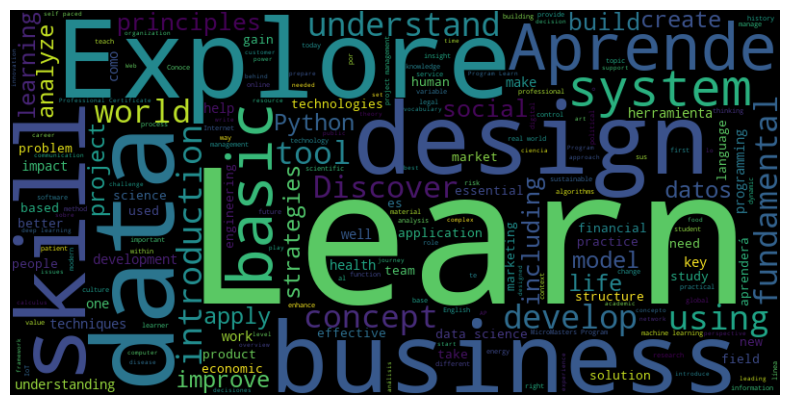

In [29]:
# Extraer el valor de la columna
summary_text = df_edx_courses['summary'].tolist()

# Unir los valore en una lista de texto
text = ' '.join(summary_text)
stopwords = set(STOPWORDS)
stopwords.update(['la', 'para', 'de la', 'de', 'que', 'con', 'y', 'y la', 'en el', 'en', 'el', 'use', 'este curso', 'este', 'curso', 'las', 'los', 'un', 'una', 'del', 'course', 'part', 'abstract', 'will', 'más', 's', 'available', 'su', 'tu', 'e', 'se', 'cómo', 'writing'])
# Step 5: Create and generate word cloud
wordcloud = WordCloud(width=800, height=400, stopwords=stopwords).generate(text)

# Step 6: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Las palabras más utilizadas en las descripciones de los cursos más populares:

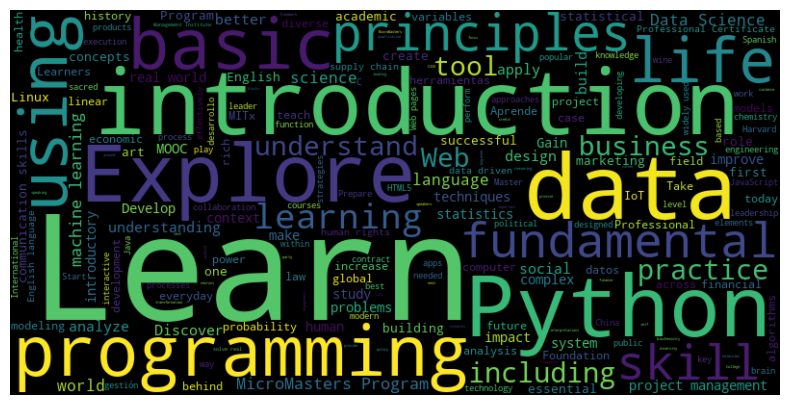

In [30]:
# Extraer el valor de la columna
df_pop = df_edx_courses[df_edx_courses['n_enrolled'] > 60000]
summary_text = df_pop['summary'].tolist()

# Unir los valore en una lista de texto
text = ' '.join(summary_text)
stopwords = set(STOPWORDS)
stopwords.update(['la', 'para', 'de la', 'de', 'que', 'con', 'y', 'y la', 'en el', 'en', 'el', 'use', 'este curso', 'este', 'curso', 'las', 'los', 'un', 'una', 'del', 'course', 'part', 'abstract', 'will', 'más', 's', 'available', 'su', 'tu', 'e', 'se', 'cómo', 'writing'])
# Step 5: Create and generate word cloud
wordcloud = WordCloud(width=800, height=400, stopwords=stopwords).generate(text)

# Step 6: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Nótese que las palabras están fuertemente relacionadas con las 5 ramas de estudio más populares previamente mencionadas.